In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data
loan_default = pd.read_csv("Loan_Default.csv")
loan_default.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


#### clean data

In [3]:
loan_default.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [4]:
# remove columns not needed
col = ['year', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Security_Type', 'dtir1', 'approv_in_adv', 'ID', 'open_credit']
loan_default.drop(columns = col, inplace = True)

In [5]:
loan_default.columns

Index(['loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'business_or_commercial', 'loan_amount',
       'rate_of_interest', 'Region', 'Status'],
      dtype='object')

In [6]:
loan_default.head()

,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Region,Status
0,cf,Sex Not Available,type1,p1,l1,nob/c,116500,NaN,south,1
1,cf,Male,type2,p1,l1,b/c,206500,NaN,North,1
2,cf,Male,type1,p1,l1,nob/c,406500,4.56,south,0
3,cf,Male,type1,p4,l1,nob/c,456500,4.25,North,0
4,cf,Joint,type1,p1,l1,nob/c,696500,4.00,North,0


In [7]:
loan_default.isna().sum()

loan_limit                 3344
Gender                        0
loan_type                     0
loan_purpose                134
Credit_Worthiness             0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36439
Region                        0
Status                        0
dtype: int64

In [8]:
loan_default.size

1486700

In [9]:
loan_default.dtypes

loan_limit                 object
Gender                     object
loan_type                  object
loan_purpose               object
Credit_Worthiness          object
business_or_commercial     object
loan_amount                 int64
rate_of_interest          float64
Region                     object
Status                      int64
dtype: object

In [10]:
# set all data to lower case
loan_default.columns = map(str.lower, loan_default.columns)

In [11]:
loan_default.head()

,loan_limit,gender,loan_type,loan_purpose,credit_worthiness,business_or_commercial,loan_amount,rate_of_interest,region,status
0,cf,Sex Not Available,type1,p1,l1,nob/c,116500,NaN,south,1
1,cf,Male,type2,p1,l1,b/c,206500,NaN,North,1
2,cf,Male,type1,p1,l1,nob/c,406500,4.56,south,0
3,cf,Male,type1,p4,l1,nob/c,456500,4.25,North,0
4,cf,Joint,type1,p1,l1,nob/c,696500,4.00,North,0


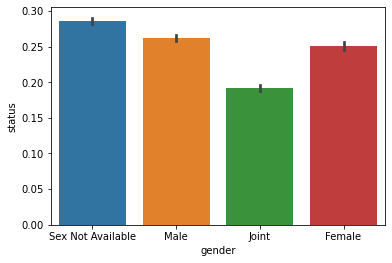

In [12]:
# plot using seaborn (gender and status)
gen = sns.barplot(x = 'gender', y = 'status', data = loan_default)
plt.show()

 the **`sex not available`** is higher that the normal so it will be dropped to avoid incorrect prediction

In [13]:
loan_default.gender.value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: gender, dtype: int64

In [14]:
# drop sex not available
loan_default.drop(loan_default.loc[loan_default['gender'] == 'Sex Not Available'].index, inplace = True)

In [15]:
loan_default.gender.value_counts()

Male      42346
Joint     41399
Female    27266
Name: gender, dtype: int64

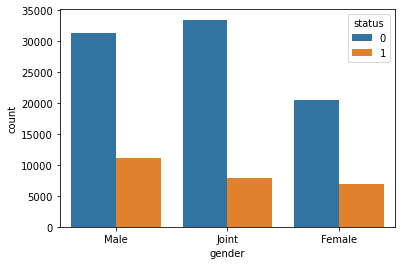

In [16]:
# count the numbers of male and female that pays the loan
gen_pay = sns.countplot(x = 'gender', hue = 'status', data = loan_default)

**both gender default payment of loan with the male higher than female**

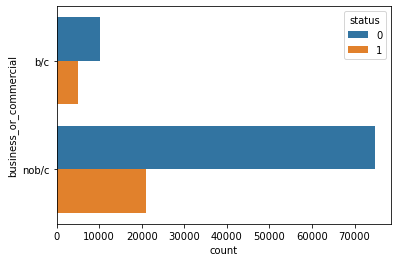

In [17]:
# using countplot count the the business and commercial
buscom = sns.countplot(y = 'business_or_commercial', hue = 'status', data = loan_default)
plt.show();

**the number of loans not used for business or commercial is higher than the no of loans used for business or commercial**

In [18]:
# split the dataset into X and y
X = loan_default.drop('status', axis = 1)
y = loan_default.status

In [19]:
X.dtypes

loan_limit                 object
gender                     object
loan_type                  object
loan_purpose               object
credit_worthiness          object
business_or_commercial     object
loan_amount                 int64
rate_of_interest          float64
region                     object
dtype: object

In [20]:
# replace the NaN
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill non-numerical values with missing and numerical values with mean
cat_imp = SimpleImputer(strategy = 'constant', fill_value = 'missing')
num_imp = SimpleImputer(strategy = 'mean')

# define columns
cat_features = ['loan_limit', 'gender', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'business_or_commercial', 'region']
num_features = ['loan_amount', 'rate_of_interest']

# create a imputer to fills the NaN values
imputer = ColumnTransformer([
    ('cat_imp', cat_imp, cat_features),
    ('num_imp', num_imp, num_features)
    ])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['cf', 'Male', 'type2', ..., 'North', 206500.0,
        4.0417509601945065],
       ['cf', 'Male', 'type1', ..., 'south', 406500.0, 4.56],
       ['cf', 'Male', 'type1', ..., 'North', 456500.0, 4.25],
       ...,
       ['cf', 'Male', 'type1', ..., 'North', 446500.0, 3.125],
       ['cf', 'Female', 'type1', ..., 'North', 196500.0, 3.5],
       ['cf', 'Female', 'type1', ..., 'North', 406500.0, 4.375]],
      dtype=object)

In [21]:
col = ['loan_limit', 'gender', 'loan_type', 'loan_purpose', 'credit_worthiness',
       'business_or_commercial', 'region', 'loan_amount', 'rate_of_interest']
filled_X = pd.DataFrame(filled_X, columns = col)
filled_X.head()

,loan_limit,gender,loan_type,loan_purpose,credit_worthiness,business_or_commercial,region,loan_amount,rate_of_interest
0,cf,Male,type2,p1,l1,b/c,North,206500.0,4.041751
1,cf,Male,type1,p1,l1,nob/c,south,406500.0,4.56
2,cf,Male,type1,p4,l1,nob/c,North,456500.0,4.25
3,cf,Joint,type1,p1,l1,nob/c,North,696500.0,4.0
4,cf,Joint,type1,p1,l1,nob/c,North,706500.0,3.99


In [22]:
# convert non-numerical to numbers using sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_features = ['loan_limit', 'gender', 'loan_type', 'loan_purpose', 'credit_worthiness',
       'business_or_commercial', 'region']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  cat_features)],
                               remainder = 'passthrough')
transformed_X = transformer.fit_transform(filled_X)
transformed_X

array([[1.0, 0.0, 0.0, ..., 0.0, 206500.0, 4.0417509601945065],
       [1.0, 0.0, 0.0, ..., 1.0, 406500.0, 4.56],
       [1.0, 0.0, 0.0, ..., 0.0, 456500.0, 4.25],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 446500.0, 3.125],
       [1.0, 0.0, 0.0, ..., 0.0, 196500.0, 3.5],
       [1.0, 0.0, 0.0, ..., 0.0, 406500.0, 4.375]], dtype=object)

In [23]:
transformed_X.shape

(111011, 24)

### This is a classification problem as such, according to the map the data is greater than 100k so we will use SGDClassifier

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# set up the random seed
np.random.seed(7)

# the data has been created (transformed_X, and y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [25]:
X_train.shape, X_test.shape

((88808, 24), (22203, 24))

In [26]:
clf.score(X_test, y_test)

0.23816601360176554

In [27]:
clf.score(X_train, y_train)

0.23178092063778039

**the model did not work let's try another: according to the map next is `RBFSampler`**


In [28]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

# set up the random seed
np.random.seed(42)

# the data has been created (transformed_X, and y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
rbf = RBFSampler()
X_features = rbf.fit_transform(transformed_X)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [29]:
clf.score(X_test, y_test)

0.7663378822681619

In [30]:
clf.score(X_train, y_train)

0.7670930546797586

**did not work as well so I used `RandomForestClassifier`**

In [31]:
from sklearn.ensemble import RandomForestClassifier

# set up the random seed
np.random.seed(7)

# the data has been created (transformed_X, and y)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
clf.score(X_train, y_train)

1.0

In [33]:
clf.score(X_test, y_test)

0.9999549610413008

In [34]:
# make prediction
y_preds = clf.predict(X_test)

In [35]:
y_preds

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [36]:
# compare prediction against truth
clf_df = pd.DataFrame(data = {'actual_values': y_test,
                              'predicted_values': y_preds})

clf_df

,actual_values,predicted_values
15360,0,0
44902,0,0
97570,0,0
118118,0,0
5691,1,1
...,...,...
96635,0,0
47809,0,0
138513,1,1
86838,0,0


In [37]:
loan_prob = clf.predict_proba(X_test)
loan_prob[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

### there is a low difference between the predicted and the actual values

In [38]:
# test the accuracy score
from sklearn.model_selection import cross_val_score
np.random.seed(7)

# normal score
clf_score = clf.score(X_test, y_test)

# mean of cross_val_score
clf_cro_score = np.mean(cross_val_score(clf, transformed_X, y))

clf_score, clf_cro_score

(0.9999549610413008, 0.9999549594184215)

In [39]:
# using confusion_matrix, evaluate the difference the dataset
from sklearn.metrics import confusion_matrix
confusion_matrix(y_preds, y_test)

array([[16914,     0],
       [    1,  5288]], dtype=int64)

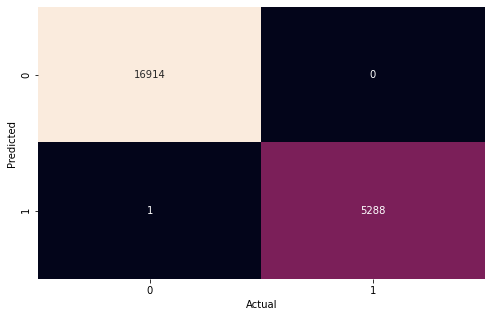

In [40]:
# Visualize confusion_matrix using seaborn
loan_mat = confusion_matrix(y_preds, y_test)

def loan_plt(loan_mat):
    fig, ax = plt.subplots(figsize = (8, 5))
    ax = sns.heatmap(loan_mat,
                     annot = True, #Annotate boxes with loan_df figures
                     cbar = False, fmt = 'g')
    plt.xlabel("Actual")
    plt.ylabel("Predicted");
    
loan_plt(loan_mat)

In [41]:
# the classification report
from sklearn.metrics import classification_report

loan_class = classification_report(y_preds, y_test)

print(loan_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16914
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     22203
   macro avg       1.00      1.00      1.00     22203
weighted avg       1.00      1.00      1.00     22203



### the data model is good and predictive